### PREMIER LEAGUE DATA ANALYSIS

In [534]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore") 


In [536]:
df = pd.read_excel('football.xlsx',index_col=0)

In [538]:
df.head()

,Team,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points
Position,,,,,,,,,
1,Liverpool,23,17,5,1,56,21,35,56
2,Arsenal,24,14,8,2,49,22,27,50
3,Nottingham Forest,24,14,5,5,40,27,13,47
4,Chelsea,24,12,7,5,47,31,16,43
5,Manchester City,24,12,5,7,48,35,13,41


In [540]:
df.dtypes

Team               object
Played              int64
Won                 int64
Drawn               int64
Lost                int64
Goals For           int64
Goals Against       int64
Goal Difference     int64
Points              int64
dtype: object

In [542]:
df.describe()

,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,23.900000,8.900000,6.100000,8.900000,36.250000,36.250000,0.000000,32.800000
std,0.307794,3.918915,2.023546,4.644181,10.477419,10.104064,18.535883,12.103066
min,23.000000,2.000000,3.000000,1.000000,18.000000,21.000000,-36.000000,9.000000
25%,24.000000,6.750000,5.000000,6.000000,28.000000,28.750000,-8.750000,26.750000
50%,24.000000,8.500000,5.500000,7.500000,35.500000,34.500000,-1.000000,32.500000
75%,24.000000,12.000000,7.250000,11.500000,43.250000,43.000000,13.000000,41.000000
max,24.000000,17.000000,10.000000,19.000000,56.000000,54.000000,35.000000,56.000000


In [544]:
corr = df.corr(numeric_only=True)

<Figure size 1000x400 with 0 Axes>

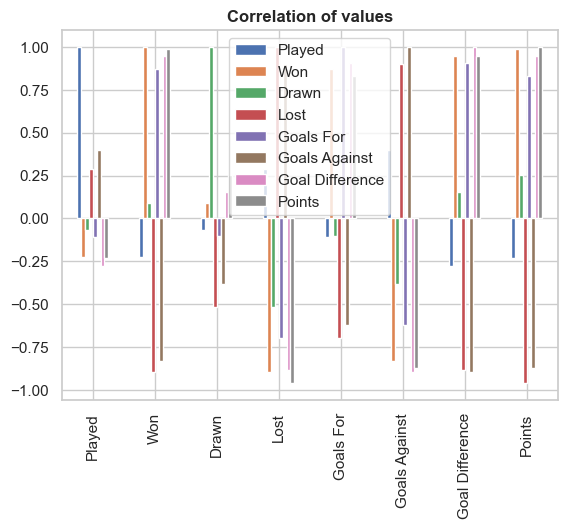

In [546]:
plt.figure(figsize=(10,4))
corr.plot(kind='bar')
plt.title('Correlation of values',fontweight='bold')
plt.show()

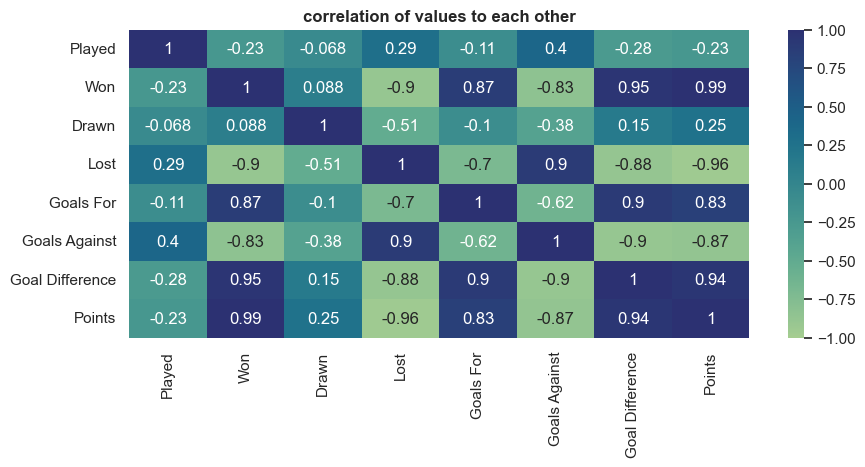

In [547]:
plt.figure(figsize=(10,4))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='crest')
plt.title('correlation of values to each other',fontweight='bold')
plt.show()

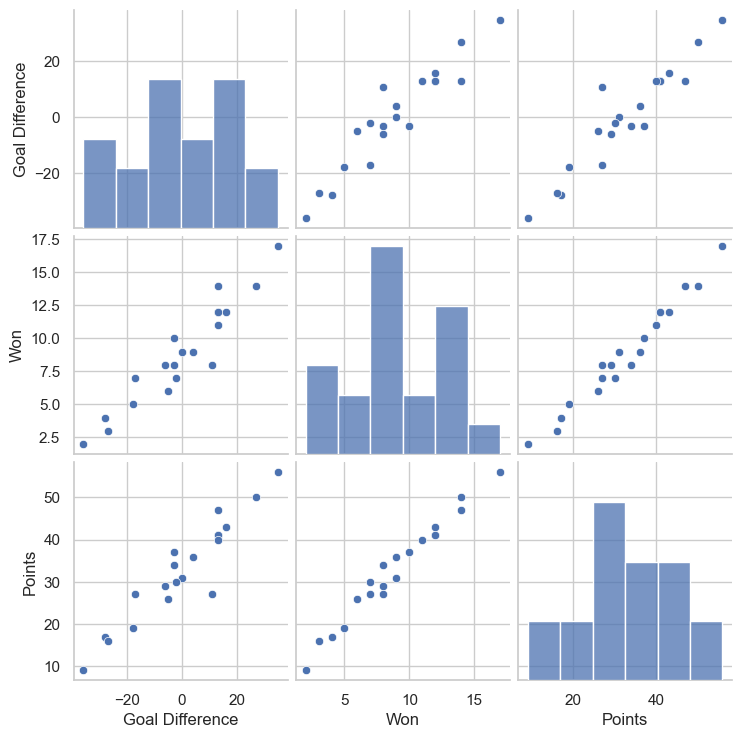

In [549]:
sns.pairplot(df[['Goal Difference','Won','Points']],palette='viridis')
plt.show()

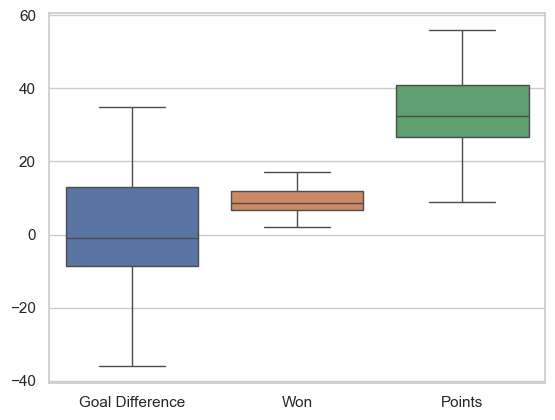

In [550]:
sns.boxplot(df[['Goal Difference','Won','Points']])
plt.show()

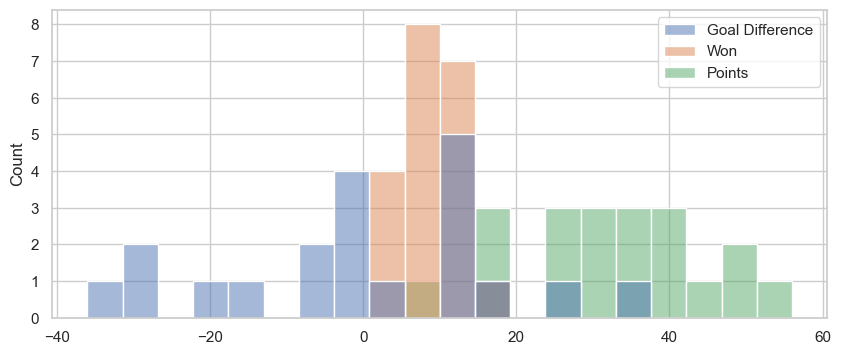

In [552]:
plt.figure(figsize=(10,4))
sns.histplot(df[['Goal Difference','Won','Points']],bins=20)
plt.show()

In [553]:
grouped= df.groupby('Team')['Points'].sum().sort_values(ascending=False)

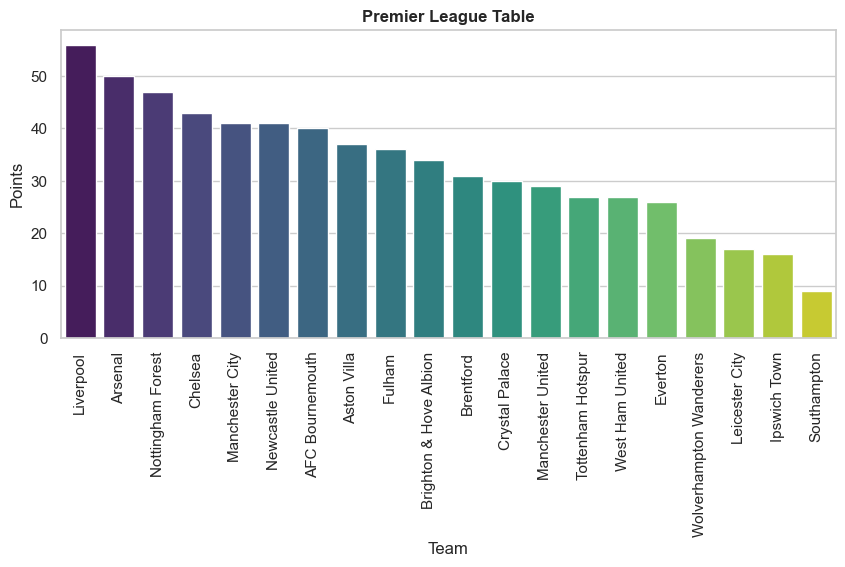

In [554]:
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
plt.title('Premier League Table',fontweight='bold')
sns.barplot(grouped,palette='viridis')
plt.savefig('Premier League Table.pdf',bbox_inches='tight')
plt.show()


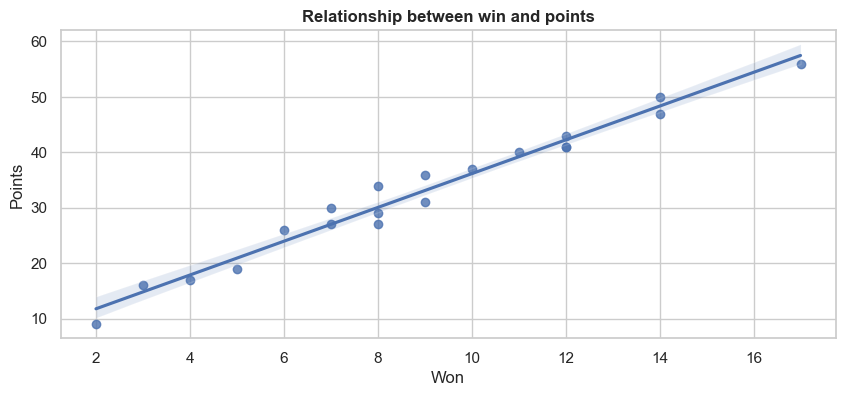

In [555]:
plt.figure(figsize=(10,4))
sns.regplot(data=df, x=df['Won'],y=df['Points'])
plt.title('Relationship between win and points',fontweight='bold')
plt.show()

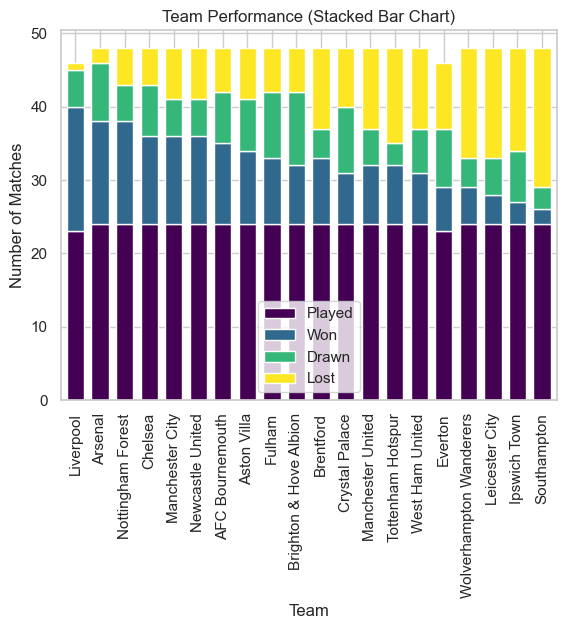

In [556]:

df.set_index('Team', inplace=True)
ax = df[['Played', 'Won', 'Drawn','Lost']].plot(kind='bar', stacked=True, colormap='viridis',width=0.7)
ax.set_ylabel('Number of Matches')
ax.set_title('Team Performance (Stacked Bar Chart)')
plt.savefig('Team Performance.pdf',bbox_inches='tight')
plt.show()